This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [ ]:
%pip install sdv
%pip install urllib3==1.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.7/136.7 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Fou

In [ ]:
from sdv.datasets.local import load_csvs

# assume that my_folder contains 1 CSV file named 'guests.csv'
datasets = load_csvs(folder_name='/content/')

# the data is available under the file name
diabetes_table = datasets['diabetes2']

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(data=diabetes_table)

In [ ]:
python_dict = metadata.to_dict()

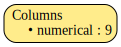

In [ ]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png'
)

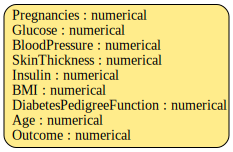

In [ ]:
metadata.visualize()

In [ ]:
metadata.validate()

In [ ]:
metadata.validate_data(data=diabetes_table)

In [ ]:
metadata.save_to_json(filepath='my_metadata_v1.json')

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata.load_from_json(
    filepath='my_metadata_v1.json')

In [ ]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(metadata, name='FAST_ML')


In [ ]:
synthesizer.fit(diabetes_table)

In [ ]:
synthetic_data = synthesizer.sample(num_rows=500)

In [ ]:
# save the data as a CSV
synthetic_data.to_csv('synthetic_data.csv', index=False)

In [ ]:
synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [ ]:
synthesizer.save(
    filepath='my_synthesizer.pkl'
)

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=diabetes_table,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 93.27it/s]

Overall Quality Score: 92.34%

Properties:
- Column Shapes: 87.12%
- Column Pair Trends: 97.56%


In [ ]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=diabetes_table,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...
(3/3) Evaluating Synthesis: : 100%|██████████| 1/1 [00:06<00:00,  6.24s/it]

Diagnostic Results:

SUCCESS:
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data
✓ Over 90% of the synthetic rows are not copies of the real data

! The synthetic data is missing more than 10% of the numerical ranges present in the real data


In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=diabetes_table,
    synthetic_data=synthetic_data,
    column_name='BMI',
    metadata=metadata
)

fig.show()

In [ ]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=diabetes_table,
    synthetic_data=synthetic_data,
    column_names=['Glucose', 'BloodPressure'],
    metadata=metadata)

fig.show()





# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [ ]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset.
data = pd.read_csv('synthetic_data.csv')

# Displaying basic information about the dataset.
print("Dataset Info:")
print(data.info())

# Displaying summary statistics.
print("\nSummary Statistics:")
print(data.describe())

# Data Cleaning (Removing rows with missing values).
data = data.dropna()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.3 KB
None

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      4.006000  120.454000      71.080000   

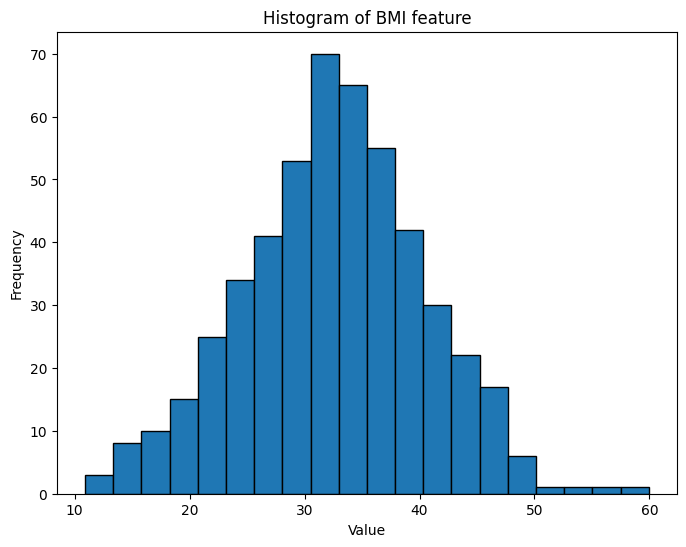

In [ ]:
# Data Visualization.
# Ploting a histogram of a BMI feature.
plt.figure(figsize=(8, 6))
plt.hist(data['BMI'], bins=20, edgecolor='k')
plt.title('Histogram of BMI feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


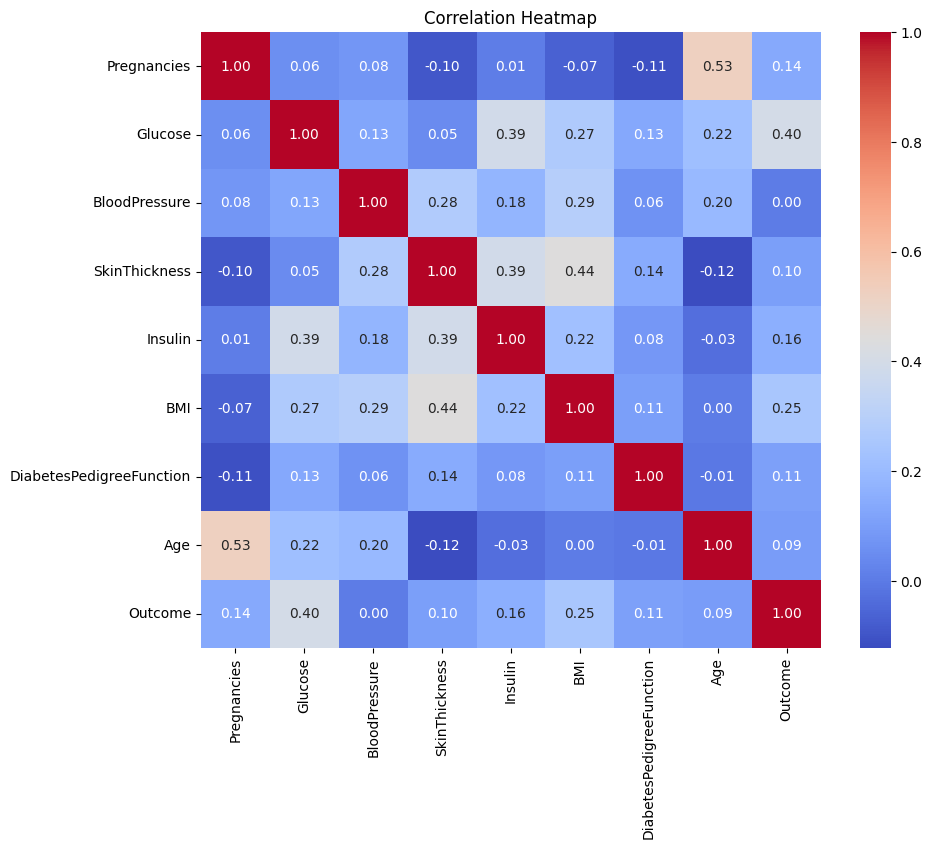

In [ ]:
# Correlation analysis.
correlation_matrix = data.corr()

# Ploting a correlation heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Splitting the data into features(X) and target variable(y).
# Separating the outcome and features into separate dataframes.

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Splitting the data into training and testing sets.

def train_test_splitting(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)

    test_indices = np.random.choice(num_samples, size=num_test_samples, replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_splitting(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Z-score Standardization)
# scaling the features can help the algorithm converge faster and improve the interpretability of the coefficients.
# z score standardization is done after splitting because it avoids data leakage since the standardization parameters are determined solely from the training data.

def z_score_standardization(X_train, X_test):
    mean = X_train.mean()
    std = X_train.std()
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = z_score_standardization(X_train, X_test)

# Now, you can use X_train_scaled and y_train for any machine learning model or analysis.
# Remember to replace 'your_dataset.csv' and 'target_column' with your specific dataset and target variable.


In [ ]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,-1.291175,0.926288,-1.458597,-1.142861,0.068235,-0.785724,-0.190287,-0.696424
3,0.022163,-0.997774,-0.552222,0.963795,-1.086423,0.057094,0.017791,0.479389
4,0.678832,-1.323385,-0.498906,0.673222,-0.239674,0.619882,-1.142136,-1.284331
5,-0.634506,-0.316952,-0.285641,0.818509,0.343153,0.393874,0.480315,-0.304487
6,0.022163,0.630278,-0.232325,-1.578721,0.244183,-1.863179,-0.739846,-1.284331


In [ ]:
X_test_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
361,1.335500,-0.790568,0.514101,-1.142861,-1.086423,-1.457570,-0.038938,1.557218
73,0.022163,0.245466,-0.072377,0.382649,-1.086423,0.542208,1.781483,0.185436
374,-0.634506,0.156663,-0.925435,0.455292,-0.382632,0.086103,-0.981456,-0.892393
155,-1.291175,-0.879370,0.087572,1.036439,0.618072,-0.464991,2.952889,0.185436
104,-1.291175,0.275067,-1.351964,-0.489071,-0.833498,-0.722079,0.553186,-1.186347


# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [ ]:
# Stochastic Gradient Descent (SGD) for Linear Regression.
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=100):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # Initialize the coefficients to zeros
    theta_history = []  # Store the history of theta values for plotting
    for epoch in range(num_epochs):
        for i in range(num_samples):
            random_index = np.random.randint(0, num_samples)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient
        theta_history.append(theta.copy())  # Copy theta to prevent modifying the original
    return theta, theta_history

# Performing the Stochastic Gradient Descent.
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train_scaled, y_train)


# Making  predictions using the learned parameters.
y_pred_sgd = X_test_scaled.dot(theta_sgd)

# Calculating Mean Squared Error for evaluation/comparison.
mse_sgd = np.mean((y_test - y_pred_sgd)**2)

# Printing the Mean Squared Error for SGD.
print("Mean Squared Error (SGD):", mse_sgd)


# Converting regression predictions to binary values based on a threshold(0.5).
threshold = 0.5
y_pred_sgd_binary = (y_pred_sgd >= threshold).astype(int)

# Calculating accuracy.
accuracy_sgd = np.mean(y_pred_sgd_binary == y_test)

#printing accuracy.
print(f"Accuracy (SGD): {100*accuracy_sgd}%")


Mean Squared Error (SGD): 0.32369511034138126
Accuracy (SGD): 66.0%


## **_Batch Gradient Descent_**

In [ ]:
# Batch Gradient Descent (BGD) for Linear Regression.
def batch_gradient_descent(X, y, learning_rate=0.01, num_epochs=100):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # Initialize the coefficients to zeros
    theta_history = []  # Store the history of theta values for plotting
    for epoch in range(num_epochs):
        gradient = (1 / num_samples) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
        theta_history.append(theta.copy())  # Copy theta to prevent modifying the original
    return theta, theta_history


# Performing Batch Gradient Descent.
theta_batch, cost_history_batch = batch_gradient_descent(X_train_scaled, y_train)

# Making predictions using the learned parameters.
y_pred_batch = X_test_scaled.dot(theta_batch)


# Calculating Mean Squared Error for evaluation.
mse_batch = np.mean((y_test - y_pred_batch)**2)


# Printing the Mean Squared Error for BGD.
print("Mean Squared Error (BGD):", mse_batch)

# Converting regression predictions to binary values based on a threshold(0.5).
threshold = 0.5
y_pred_batch_binary = (y_pred_batch >= threshold).astype(int)

# Calculating accuracy.
accuracy_batch = np.mean(y_pred_batch_binary == y_test)

#printing accuracy.
print(f"Accuracy (BGD): {100*accuracy_batch}%")

Mean Squared Error (BGD): 0.32474146315647234
Accuracy (BGD): 63.0%


## **_Insights drawn (plots, markdown explanations)_**

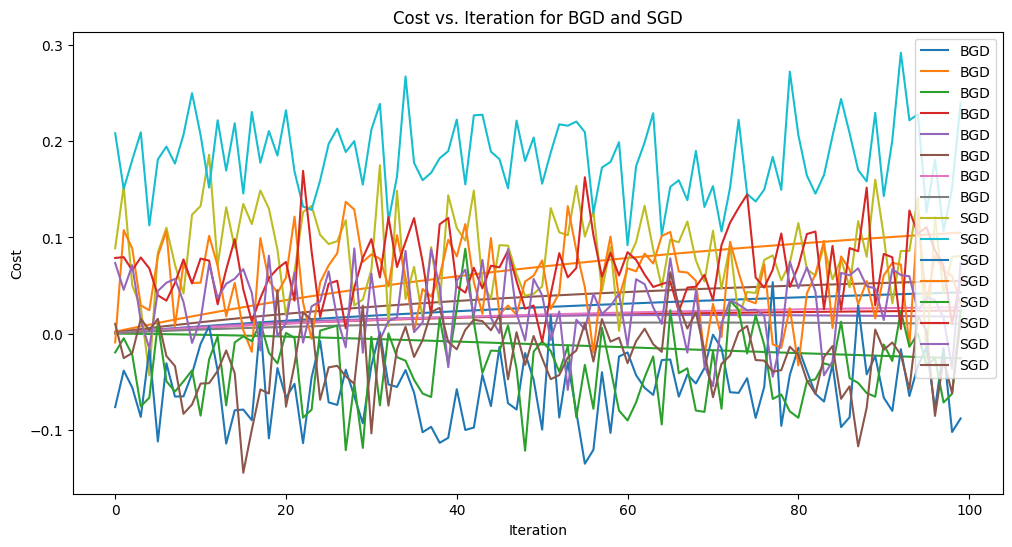

In [ ]:
# Comparing the performance of SGD and BGD by plotting the cost history.
plt.figure(figsize=(12, 6))
plt.plot(range(len(cost_history_batch)), cost_history_batch, label='BGD')
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration for BGD and SGD')
plt.legend()
plt.show()

We can see from above analysis that SGD algorithm takes longer time than compared to BGD but SGD has the higher accuracy. In summary, BGD uses the entire dataset in each iteration and converges more smoothly, while SGD processes individual data points or mini-batches and converges noisily but may converge faster and be more efficient for large datasets.

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [ ]:
# Polynomial Features.
# we can adjust the degree of the polynomial features.
degree = 2
def polynomial_features(X, degree):
    X_poly = X.copy()
    for d in range(2, degree + 1):
        for feature in X.columns:
            new_feature_name = f"{feature}^{d}"
            X_poly[new_feature_name] = X[feature] ** d
    return X_poly

X_train_poly = polynomial_features(X_train_scaled, degree)
X_test_poly = polynomial_features(X_test_scaled, degree)


# Implementing Lasso Regression using polynomial features.
def lasso_regression(X, y, alpha, max_iter=1000, tol=1e-4):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    num_samples, num_features = X_b.shape
    theta = np.zeros(num_features)
    for _ in range(max_iter):
        theta_prev = theta.copy()
        for j in range(num_features):
            y_pred = X_b.dot(theta)
            rho = X_b[:, j].T.dot(y - y_pred)
            if j == 0:  # Skip the bias term
                theta[j] = rho
            else:
                z_j = X_b[:, j].T.dot(X_b[:, j])
                if rho < -alpha / 2:
                    theta[j] = (rho + alpha / 2) / z_j
                elif rho > alpha / 2:
                    theta[j] = (rho - alpha / 2) / z_j
                else:
                    theta[j] = 0
        if np.linalg.norm(theta - theta_prev) < tol:
            break
    return theta[1:]  # Exclude the bias term

# We can adjust the regularization strength (alpha) for Lasso regression.
alpha_lasso = 1.0
theta_lasso = lasso_regression(X_train_poly, y_train, alpha_lasso)
y_pred_lasso = X_test_poly.dot(theta_lasso)

# Calculating the Mean Squared Error for Lasso Regression.
mse_lasso = np.mean((y_pred_lasso - y_test) ** 2)

# printing the mse.
print("Mean Squared Error (Lasso Regression):", mse_lasso)

# Converting regression predictions to binary values based on a threshold(0.5).
threshold = 0.5
y_pred_lasso_binary = (y_pred_lasso >= threshold).astype(int)

# Calculating accuracy.
accuracy_lasso = np.mean(y_pred_lasso_binary == y_test)

#printing accuracy.
print(f"Accuracy (lasso): {100*accuracy_lasso}%")


Mean Squared Error (Lasso Regression): 0.37
Accuracy (lasso): 63.0%


## **_Ridge Regression_**

In [ ]:
# Implementing Ridge Regression using polynomial features.
def ridge_regression(X, y, alpha):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    num_features = X_b.shape[1]
    A = np.eye(num_features)
    A[0, 0] = 0  # Exclude bias term from regularization
    theta = np.linalg.inv(X_b.T.dot(X_b) + alpha * A).dot(X_b.T).dot(y)
    return theta[1:]  # Exclude the bias term

# We can adjust the regularization strength (alpha) for Ridge regression.

alpha_ridge = 1.0
theta_ridge = ridge_regression(X_train_poly, y_train, alpha_ridge)
y_pred_ridge = X_test_poly.dot(theta_ridge)

# Calculating the Mean Squared Error for Ridge Regression.
mse_ridge = np.mean((y_pred_ridge - y_test) ** 2)

# printing mse.
print("Mean Squared Error (Ridge Regression):", mse_ridge)

# Converting regression predictions to binary values based on a threshold(0.5).
threshold = 0.5
y_pred_ridge_binary = (y_pred_ridge >= threshold).astype(int)

# Calculating accuracy.
accuracy_ridge = np.mean(y_pred_ridge_binary == y_test)

#printing accuracy.
print(f"Accuracy (ridge): {100*accuracy_ridge}%")


Mean Squared Error (Ridge Regression): 0.2865641629838601
Accuracy (ridge): 64.0%


## **_Insights drawn (plots, markdown explanations)_**

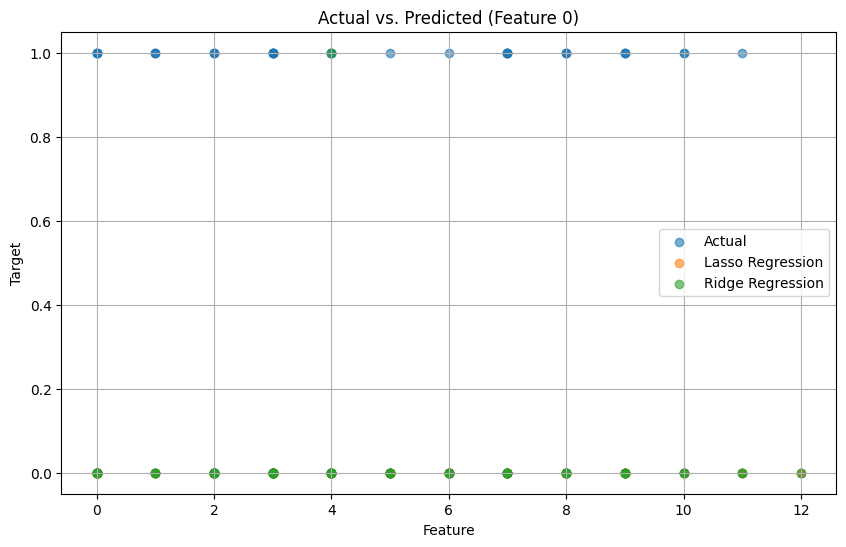

In [ ]:
# We can adjust this index to plot different features.
feature_index = 0
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, feature_index], y_test, label="Actual", alpha=0.6)
plt.scatter(X_test.iloc[:, feature_index], y_pred_lasso_binary, label="Lasso Regression", alpha=0.6)
plt.scatter(X_test.iloc[:, feature_index], y_pred_ridge_binary, label="Ridge Regression", alpha=0.6)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title(f"Actual vs. Predicted (Feature {feature_index})")
plt.grid()
plt.show()

Ridge primarily addresses the issue of multicollinearity and helps control the model's variance. It can lead to a slight increase in bias compared to an unregularized model. Lasso addresses multicollinearity and offers feature selection, but it can introduce more bias compared to Ridge due to its sparsity-inducing nature and we can also see from above analysis that mean sqaured error of ridge regression is less compared to lasso regression.

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [ ]:
# Implementing Logistic Regression.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_train(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)

    for iteration in range(n_iterations):
        z = X.dot(theta)
        h = sigmoid(z)
        gradient = X.T.dot(h - y) / m
        theta -= learning_rate * gradient

    return theta

# Training Logistic Regression.
theta_logistic = logistic_regression_train(X_train_scaled, y_train)



# Making predictions.
def predict(X, theta):
    z = X.dot(theta)
    return (z >= 0.5).astype(int)

y_pred_logistic = predict(X_test_scaled, theta_logistic)

# Evaluating the accuracy.
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

accuracy_logistic = accuracy(y_test, y_pred_logistic)

print(f"Logistic Regression Accuracy: {100*accuracy_logistic}%")

Logistic Regression Accuracy: 69.0%


## **_Least Squares Classification_**

In [ ]:
# Implementing Least Squares Classification.
def least_squares_classification_train(X, y):
    X_pseudo_inv = np.linalg.pinv(X)
    theta = X_pseudo_inv.dot(y)
    return theta


# Training Least Squares Classification.
theta_least_squares = least_squares_classification_train(X_train_scaled, y_train)

# Making predictions.
def predict(X, theta):
    z = X.dot(theta)
    return (z >= 0.5).astype(int)

y_pred_least_squares = predict(X_test_scaled, theta_least_squares)

# Evaluating accuracy.
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

accuracy_least_squares = accuracy(y_test, y_pred_least_squares)

# printing accuracy
print(f"Least Squares Classification Accuracy: {100*accuracy_least_squares}%")



Least Squares Classification Accuracy: 63.0%


## **_Insights drawn (plots, markdown explanations)_**

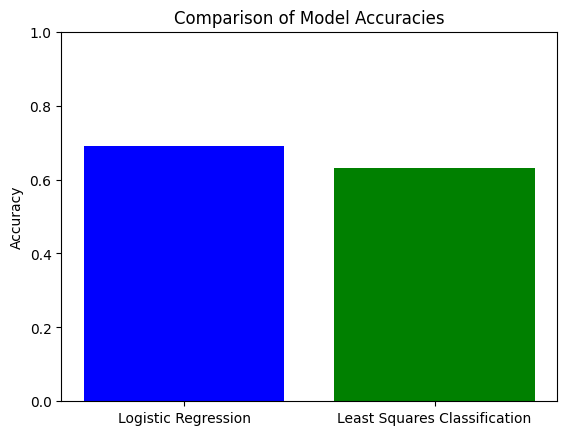

In [ ]:
# Creating a bar plot to compare accuracies.
models = ['Logistic Regression', 'Least Squares Classification']
accuracies = [accuracy_logistic, accuracy_least_squares]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
# Setting the y-axis limits between 0 and 1
plt.ylim(0, 1)
plt.show()

We can see Logistic regression results is comparable to those of least square regression, but gives more accurate predictions of probabilities on the dependent outcome. Least square regression is accurate in predicting continuous values from dependent variables.This can be proved from above analysis as logistic regression has accuracy of 69% where as least sqaure classification accuracy is comparable to logistic but a less(63%).

# **_5. References_**

1.   https://docs.sdv.dev/sdv/
2.   https://numpy.org/doc/stable/reference/generated/numpy.exp.html
3.   https://pandas.pydata.org/docs/reference/general_functions.html
4.   https://matplotlib.org/stable/gallery/index.html

